### Importing Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Loading the Data

In [36]:
btc = pd.read_csv("BTC_Daily.csv")

In [37]:
btc.head()

,Date,Open,High,Low,Last,Diff_Open_Cls
0,7/17/2014,613.03,628.94,610.00,623.01,-9.98
1,7/18/2014,622.73,632.80,618.46,629.70,-6.97
2,7/19/2014,629.71,632.06,624.95,627.53,2.18
3,7/20/2014,628.88,628.89,619.99,624.66,4.22
4,7/21/2014,624.49,625.31,615.04,620.00,4.49


In [38]:
btc.dtypes

Date              object
Open             float64
High             float64
Low              float64
Last             float64
Diff_Open_Cls    float64
dtype: object

In [39]:
# Converting Dates into a Datetime Format
btc["Date"] = pd.to_datetime(btc.Date)
btc.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Last                    float64
Diff_Open_Cls           float64
dtype: object

In [40]:
# Setting dates as the index
btc.set_index('Date', inplace=True)

In [41]:
btc.head()

,Open,High,Low,Last,Diff_Open_Cls
Date,,,,,
2014-07-17,613.03,628.94,610.00,623.01,-9.98
2014-07-18,622.73,632.80,618.46,629.70,-6.97
2014-07-19,629.71,632.06,624.95,627.53,2.18
2014-07-20,628.88,628.89,619.99,624.66,4.22
2014-07-21,624.49,625.31,615.04,620.00,4.49


In [42]:
# Selecting only the Closing Price as well as the dates starting from January 2017.
# This is the time when Bitcoin and Cryptocurrency in general started to become popular to trade and is probably a better representation of current crypto trading trends.

btc_prices = btc[['Last']].loc['2017-01-01':]
btc_prices.head()

,Last
Date,
2017-01-01,996.68
2017-01-02,1011.32
2017-01-03,1035.51
2017-01-04,1114.35
2017-01-05,1004.73


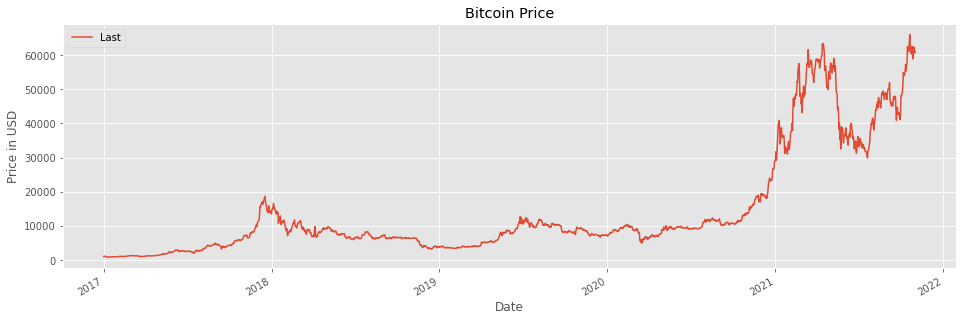

In [43]:
# Plotting Bitcoin's Historical Prices
btc_prices.plot(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price')
plt.savefig('btcprice.png')


plt.show()

In [44]:
btc_diff = btc_prices.diff(1).dropna()

In [45]:
btc_diff.head()

,Last
Date,
2017-01-02,14.64
2017-01-03,24.19
2017-01-04,78.84
2017-01-05,-109.62
2017-01-06,-110.84


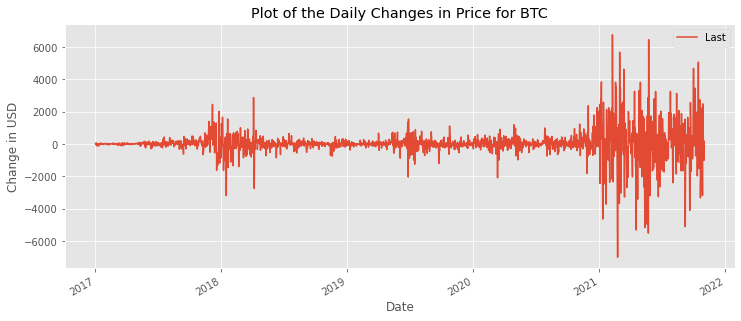

In [46]:
# Plotting the differences daily
btc_diff.plot(figsize=(12,5))
plt.title('Plot of the Daily Changes in Price for BTC')
plt.ylabel('Change in USD')
plt.show()

### K-means Algorithm

In [47]:
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans

In [48]:
btc.head()

,Open,High,Low,Last,Diff_Open_Cls
Date,,,,,
2014-07-17,613.03,628.94,610.00,623.01,-9.98
2014-07-18,622.73,632.80,618.46,629.70,-6.97
2014-07-19,629.71,632.06,624.95,627.53,2.18
2014-07-20,628.88,628.89,619.99,624.66,4.22
2014-07-21,624.49,625.31,615.04,620.00,4.49


In [63]:
btc = btc[:,['Last','Diff_Open_Cls']].loc['2017-01-01':]
btc.head()

,Last,Diff_Open_Cls
Date,,
2017-01-01,996.68,-30.34
2017-01-02,1011.32,-14.59
2017-01-03,1035.51,-24.08
2017-01-04,1114.35,-78.84
2017-01-05,1004.73,109.62


In [64]:
x = btc.values

In [65]:
x.shape

(1734, 2)

In [68]:
def timeseries_to_supervised(X, timesteps,n_target):
    x = np.zeros([len(X)-(timesteps+n_target), timesteps, X.shape[1]])
    y = np.zeros([len(X)-(timesteps+n_target), n_target])
    
    for t in range(timesteps):
        x[:,t] = X[t:-(timesteps+n_target)+t,:]
    for i in range(n_target):
        y[:,i] = X[timesteps+i:-(n_target-i),0]
    return x,y

In [69]:
# How it will behave the next two days considering the last 30 days
X,y=timeseries_to_supervised(x, 30, 2)

In [71]:
X[-1,:,0]

array([43438.5 , 48124.18, 48013.52, 48915.95, 49000.75, 51470.86,
       54924.79, 54197.75, 53988.23, 54589.99, 55345.64, 57320.06,
       55345.68, 56969.57, 57445.95, 62512.35, 60991.36, 61011.41,
       61378.35, 64128.64, 65992.78, 62668.5 , 60719.58, 61120.13,
       60307.79, 62539.22, 62088.98, 58908.09, 61393.96, 62379.71])

In [72]:
y[-1,:]

array([61669.21, 60655.85])

In [74]:
# Convert numeric value to variable category
# 0 = price drop = sell
# 1 = price increase = buy
price_last_day = X[:,-1,0]
price_next_two_days = y[:,1]
target = price_next_two_days-price_last_day
target[target<=0]=0
target[target>0]=1
target[:10]


array([1., 1., 1., 1., 0., 0., 1., 1., 0., 0.])

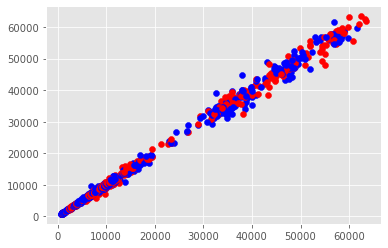

In [75]:
for i in range(target.shape[0]):
    if target[i]==0:
        plt.scatter(X[i,0,0],X[i,1,0],color='r')
    else:
        plt.scatter(X[i,0,0],X[i,1,0],color='b')

In [79]:
X.shape

(1702, 30, 2)

In [80]:
X_flatten=np.zeros((X.shape[0],X.shape[1]*X.shape[2]))
for i in range(X.shape[0]):
    X_flatten[i,:]=X[i,:].flatten()

In [82]:
X_flatten.shape

(1702, 60)

In [85]:
#Training and Test
tt=int(0.9*len(X))
x_train,x_test = X_flatten[:tt],X_flatten[tt:]
y_train,y_test = target[:tt],target[tt:]

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)

y_pred = kmeans.predict(x_test)

In [92]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0.])